In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import numpy as np
from datetime import datetime # Para pegar a data atual
import matplotlib.dates as mdates

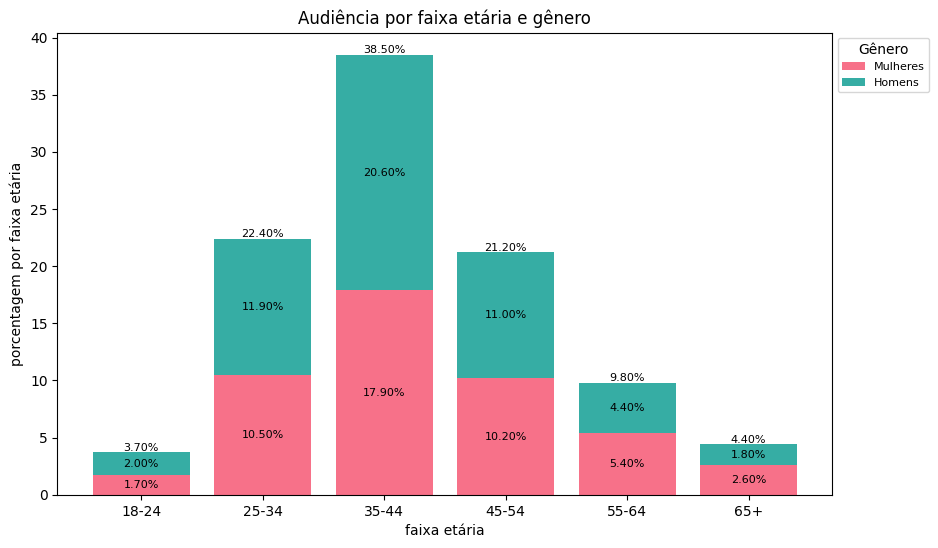

In [3]:
'''
https://business.facebook.com

https://business.facebook.com/latest/insights/people?asset_id=146958865328939&ad_account_id=23862053469140633&entity_type=FB_PAGE

CAMINHO: Insights (barra lateral) >>> Público (menu lateral) >>> 

Ações: Exportar (dropdown) >>> Exportar como csv
'''



idade = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\JPN\Público.csv", skiprows= 13, encoding='utf-16')

idade3 = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\JPN\Público.csv", skiprows= 13, encoding='utf-16')

idadeIG = idade3.iloc[0:6]

idade['m_ig'] = idadeIG['Mulheres'].apply(lambda x: x.split('%')[-2].replace(',', '.')).astype('float')
idade['h_ig'] = idadeIG['Homens'].apply(lambda x: x.split('%')[-2].replace(',', '.')).astype('float')

followersIG = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\JPN\Público.csv", skiprows= 5, encoding='utf-16', delimiter=';')

IG_followers = followersIG[1:2]

IG_followers = int(IG_followers['Seguidores do Instagram'][1])

# Calcula os totais das colunas de homens e mulheres,
idade['t_h'] = ((IG_followers * idade['h_ig'])) / (+IG_followers)

idade['t_m'] = ((IG_followers * idade['m_ig'])) / (IG_followers)

# Reorganização da estrutura dos dados usando a função melt
melted_data = pd.melt(idade, id_vars=['Idade'], value_vars=['t_m', 't_h'])

# Cria o gráfico usando matplotlib
plt.figure(figsize=(10, 6))

# Escolhe uma paleta de cores do seaborn (pode ser alterada conforme desejado)
colors = sns.color_palette("husl", 2)

# Gera o gráfico de barras empilhadas com cores personalizadas
bottom = None
for i, gender in enumerate(melted_data['variable'].unique()):
    subset = melted_data[melted_data['variable'] == gender]
    plt.bar(subset['Idade'], subset['value'], label=gender, bottom=bottom, color=colors[i])
    if bottom is None:
        bottom = subset['value']
    else:
        bottom += subset['value']

# Adiciona rótulos e títulos ao gráfico
plt.xlabel('faixa etária')
plt.ylabel('porcentagem por faixa etária')
plt.title('Audiência por faixa etária e gênero')

# Adiciona rótulos no meio das barras
for age, t_m, t_h in zip(idade['Idade'][0:6], idade['t_m'], idade['t_h']):
    plt.text(age, t_m / 2, f'{t_m:.2f}%', ha='center', va='center', fontsize=8, color='black')
    plt.text(age, t_m + t_h / 2, f'{t_h:.2f}%', ha='center', va='center', fontsize=8, color='black')

# Adiciona rótulos nos topos das barras
for age, t_m, t_h in zip(idade['Idade'][0:6], idade['t_m'], idade['t_h']):
    plt.text(age, t_m + t_h, f'{t_m + t_h:.2f}%', ha='center', va='bottom', fontsize=8)

# Adiciona a legenda com cores personalizadas
legend_labels = ['Mulheres', 'Homens']
plt.legend(title="Gênero", labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)

# Exibe o gráfico
plt.show()

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


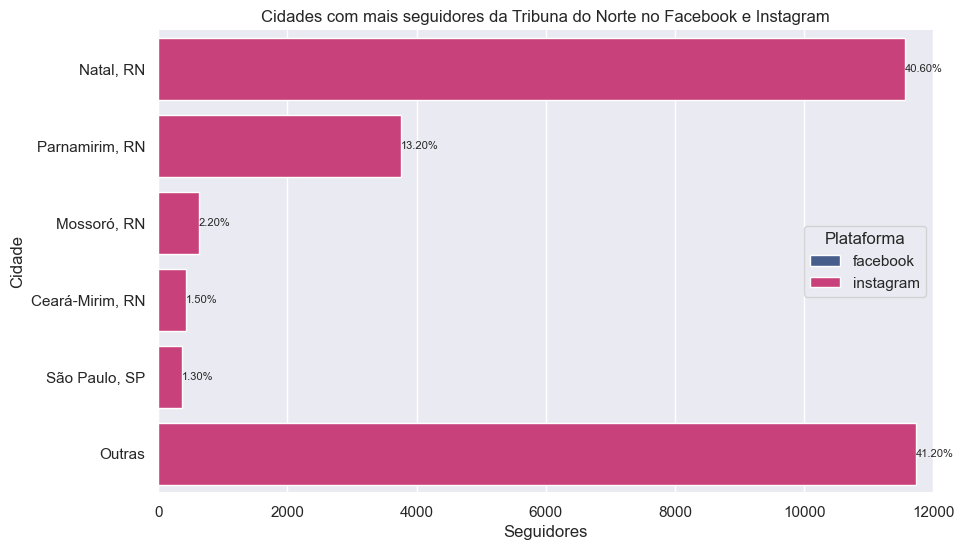

In [4]:
'''
https://business.facebook.com

https://business.facebook.com/latest/insights/people?asset_id=146958865328939&ad_account_id=23862053469140633&entity_type=FB_PAGE

CAMINHO: Insights (barra lateral) >>> Público (menu lateral) >>> 

Ações: Exportar (dropdown) >>> Exportar como csv
'''
cidadesIG = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\JPN\Público.csv", skiprows=25, encoding='utf-16')

cidadesIG = cidadesIG.iloc[0:5]

cidadesIG['Valor'] = cidadesIG['Valor'].apply(lambda x: x.split('%')[-2].replace(',', '.')).astype('float')

followersIG = pd.read_csv(r"C:\Users\Usuario\Documents\Repositórios\csv\JPN\Público.csv", skiprows= 5, encoding='utf-16', delimiter=';')

IG_followers = followersIG[1:2]

IG_followers = int(IG_followers['Seguidores do Instagram'][1])

cidades = pd.DataFrame({
    'cidade': cidadesIG['Principais cidades'],
    'facebook': 0,
    'instagram': cidadesIG['Valor']
})

#cidades['instagram'].fillna(np.nan)

for citys,valor in zip(cidadesIG['Principais cidades'],cidadesIG['Valor']):
    numero_linha = cidadesIG.index[cidadesIG['Principais cidades'] == citys].tolist()[0]
    # cidades['instagram'][numero_linha] = cidadesIG['Valor'][numero_linha]
    cidades.loc[cidades['cidade'] == citys, 'instagram'] = valor

cidades.loc[len(cidades)] = {'cidade':'Outras', 'facebook': abs(cidades['facebook'].sum()-100), 'instagram': abs(cidades['instagram'].sum()-100)}

cidades['facebook'] = cidades['facebook']*0/100
cidades['instagram'] = cidades['instagram']*IG_followers/100

# Total de seguidores
total_fb = cidades['facebook'].sum(skipna=True)
total_ig = cidades['instagram'].sum(skipna=True)
total = total_fb + total_ig

# Criar gráfico
sns.set(style="darkgrid") # Define o estilo do seaborn
plt.figure(figsize=(10, 6))

# Mapeamento de cores
# cor_fb = sns.color_palette("#3b5998")
# cor_ig = sns.color_palette("#DF2A77")

# Plotagem
# dodge=False serve para colocar mais de uma barra, pois ela "desvia" da outro e ficam mais finas
sns.barplot(data=pd.melt(cidades, id_vars='cidade'), x='value', y='cidade', hue='variable', dodge=False, palette={  'instagram': '#DF2A77','facebook': '#3b5998' })

# Adicionar percentuais
for i, p in enumerate(plt.gca().patches):
    if p.get_width() > 0:
        percentage = 100 * p.get_width() / total
        plt.text(p.get_x() + p.get_width() + 0.02, p.get_y() + p.get_height() / 2, f"{percentage:.2f}%", ha='left', va='center', size=8)

# Ajustes estéticos
plt.title('Cidades com mais seguidores da Tribuna do Norte no Facebook e Instagram')
plt.xlabel('Seguidores')
plt.ylabel('Cidade')
plt.xlim(0, 12000)
plt.legend(title='Plataforma')
sns.despine(left=True, bottom=True)

# Exibir gráfico
plt.show()

In [4]:
'''
https://business.facebook.com

https://business.facebook.com/latest/insights/results?asset_id=146958865328939&ad_account_id=23862053469140633&entity_type=FB_PAGE

CAMINHO: Insights (barra lateral) >>> Resultados (menu lateral) >>> 

Ações: Exportar (3 dropdown) >>> Exportar como csv
'''
import csv

def encontrar_frase_em_csv_meta(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-16') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1


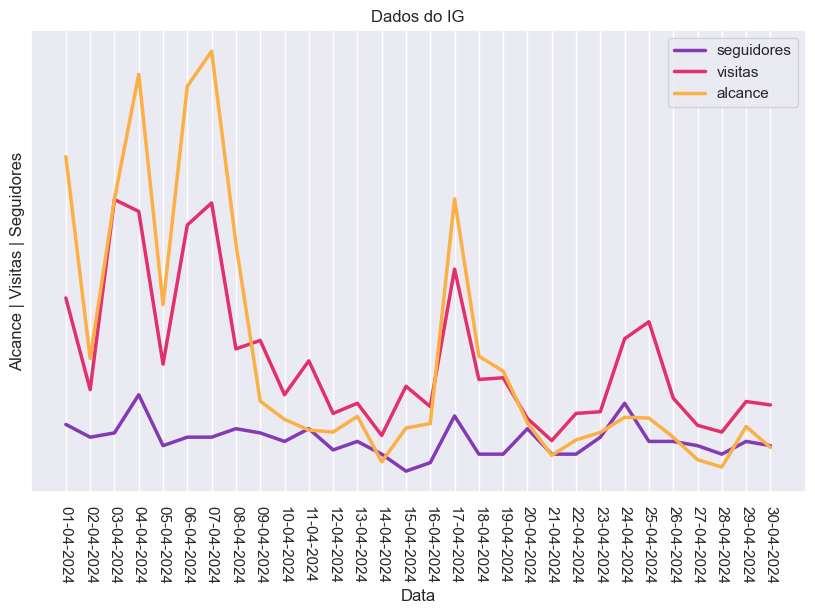

In [18]:
'''
https://business.facebook.com

https://business.facebook.com/latest/insights/results?asset_id=146958865328939&ad_account_id=23862053469140633&entity_type=FB_PAGE

CAMINHO: Insights (barra lateral) >>> Resultados (menu lateral) >>> 

Ações: Exportar (3 dropdown) >>> Exportar como csv
'''
import csv

def encontrar_frase_em_csv_meta(nome_arquivo, frase_procurada):
    try:
        with open(nome_arquivo, 'r', newline='', encoding='utf-16') as arquivo_csv:
            leitor_csv = csv.reader(arquivo_csv)
            
            for numero_linha, linha in enumerate(leitor_csv, start=1):
                if frase_procurada in linha:
                    return numero_linha

        # Se a frase não for encontrada em nenhuma linha
        return -1

    except FileNotFoundError:
        print(f'O arquivo {nome_arquivo} não foi encontrado.')
        return -1

# ALCANCE
inicio_alcanceIG = encontrar_frase_em_csv_meta(r'C:\Users\aliss\Documents\Repositórios\csv\JPN\Alcance.csv', 'Alcance do Instagram')

alcanceIG = pd.read_csv(r'C:\Users\aliss\Documents\Repositórios\csv\JPN\Alcance.csv', skiprows=inicio_alcanceIG, encoding='utf-16', skip_blank_lines=True)

alcanceIG['Data'] = pd.to_datetime(alcanceIG['Data']).dt.strftime('%d-%m-%Y')

# VISITAS
inicio_visitasIG = encontrar_frase_em_csv_meta(r'C:\Users\aliss\Documents\Repositórios\csv\JPN\Visitas.csv', 'Visitas ao perfil do Instagram')

#final_visitasIG = encontrar_frase_em_csv_meta(r'C:\Users\aliss\Documents\Repositórios\csv\JPN\Visitas.csv', 'Visitas ao Facebook')

visitasIG = pd.read_csv(r'C:\Users\aliss\Documents\Repositórios\csv\JPN\Visitas.csv', skiprows=inicio_visitasIG, encoding='utf-16', skip_blank_lines=True)

visitasIG['Data'] = pd.to_datetime(visitasIG['Data']).dt.strftime('%d-%m-%Y')

visitasIG['Primary'] = visitasIG['Primary']*100

# SEGUIDORES
inicio_seguidoresIG = encontrar_frase_em_csv_meta(r'C:\Users\aliss\Documents\Repositórios\csv\JPN\Seguidores.csv', 'Seguidores no Instagram')

seguidoresIG = pd.read_csv(r'C:\Users\aliss\Documents\Repositórios\csv\JPN\Seguidores.csv', skiprows=inicio_seguidoresIG, encoding='utf-16', skip_blank_lines=True)

seguidoresIG['Data'] = pd.to_datetime(seguidoresIG['Data']).dt.strftime('%d-%m-%Y')

seguidoresIG['Primary'] = seguidoresIG['Primary']*250


# social_media_data['Data'] = pd.to_datetime(social_media_data['Data'])
# social_media_data['Seguidores'] = social_media_data['Seguidores']*200
# social_media_data['Seguidores do Instagram'] = social_media_data['Seguidores do Instagram']*20

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#833AB4", "#E1306C", "#FCAF45"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="Primary", data=seguidoresIG, label="seguidores", linewidth=2.5, color=cores[0])
sns.lineplot(x="Data", y="Primary", data=visitasIG, label="visitas", linewidth=2.5, color=cores[1])
sns.lineplot(x="Data", y="Primary", data=alcanceIG, label="alcance", linewidth=2.5, color=cores[2])

# Ajustando o intervalo entre as datas no eixo x
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("Alcance | Visitas | Seguidores")
plt.title("Dados do IG")

plt.yticks([])

plt.legend()

# Exibindo o gráfico
plt.show()

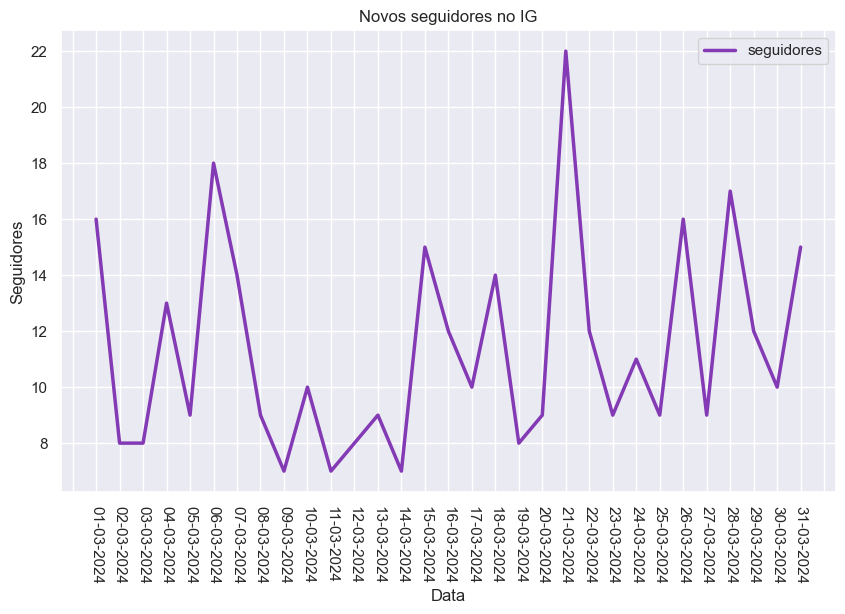

In [17]:
# SEGUIDORES
inicio_seguidoresIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\Seguidores.csv', 'Seguidos no Instagram')
#final_visitasIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\Visitas.csv', 'Seguidos no Instagram')
seguidoresIG = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\Seguidores.csv', skiprows=inicio_seguidoresIG, encoding='utf-16', skip_blank_lines=True,)

seguidoresIG['Data'] = pd.to_datetime(seguidoresIG['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
#custom = {"axes.facecolor": "black"}
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#833AB4", "#E1306C", "#FCAF45"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="Primary", data=seguidoresIG, label="seguidores", linewidth=2.5, color=cores[0])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("Seguidores")
plt.title("Novos seguidores no IG")

plt.legend()

# Exibindo o gráfico
plt.show()

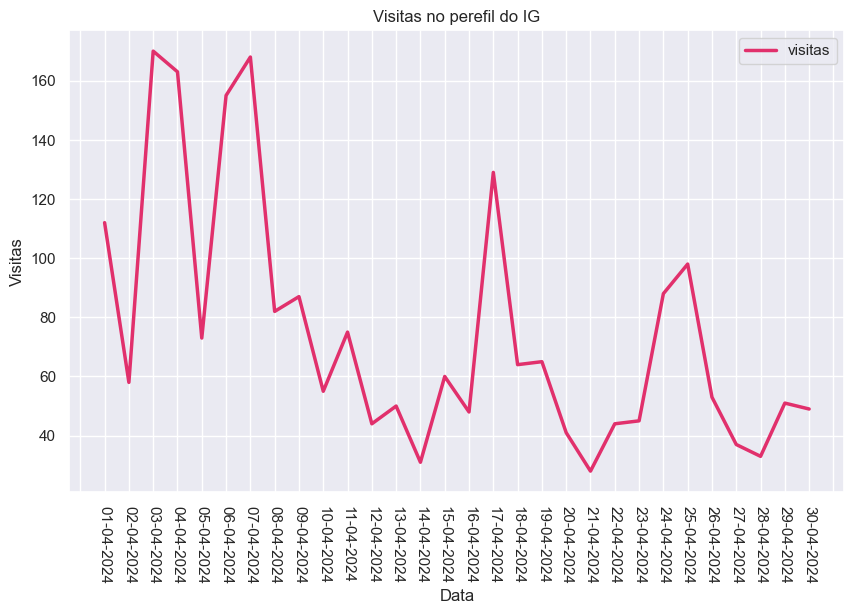

In [9]:
# VISITAS
inicio_visitasIG = encontrar_frase_em_csv_meta(r'C:\Users\aliss\Documents\Repositórios\csv\JPN\Visitas.csv', 'Visitas ao perfil do Instagram')
#final_visitasIG = encontrar_frase_em_csv_meta(r'C:\Users\aliss\Documents\Repositórios\csv\JPN\Visitas.csv', 'Visitas ao Facebook')

visitasIG = pd.read_csv(r'C:\Users\aliss\Documents\Repositórios\csv\JPN\Visitas.csv', skiprows=inicio_visitasIG, encoding='utf-16', skip_blank_lines=True)

visitasIG['Data'] = pd.to_datetime(visitasIG['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#833AB4", "#E1306C", "#FCAF45"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="Primary", data=visitasIG, label="visitas", linewidth=2.5, color=cores[1])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("Visitas")
plt.title("Visitas no perefil do IG")

plt.legend()

# Exibindo o gráfico
plt.show()

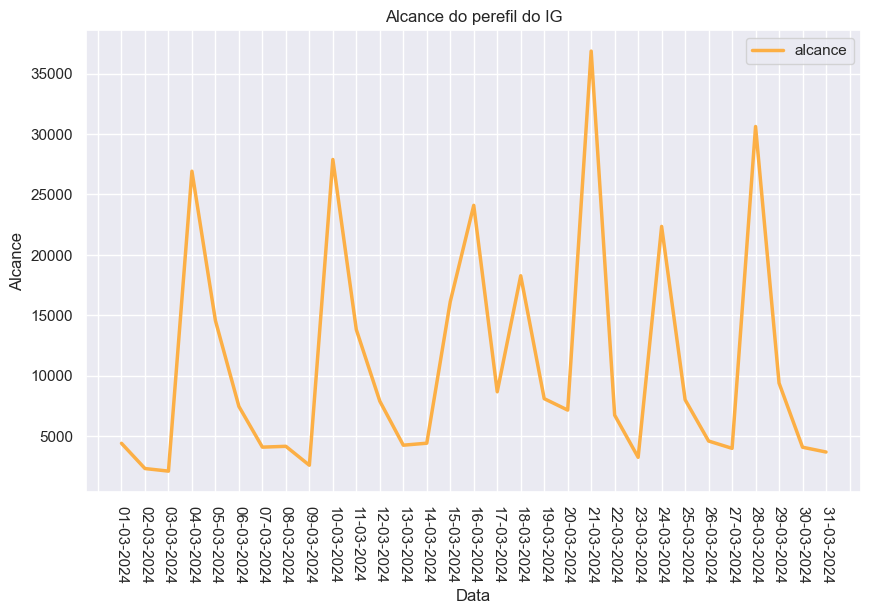

In [19]:
# ALCANCE
inicio_alcanceIG = encontrar_frase_em_csv_meta(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\Alcance.csv', 'Alcance do Instagram')

alcanceIG = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\Alcance.csv', skiprows=inicio_alcanceIG, encoding='utf-16', skip_blank_lines=True)

alcanceIG['Data'] = pd.to_datetime(alcanceIG['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#833AB4", "#E1306C", "#FCAF45"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="Primary", data=alcanceIG, label="alcance", linewidth=2.5, color=cores[2])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
plt.ylabel("Alcance")
plt.title("Alcance do perefil do IG")

plt.legend()

# Exibindo o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14560\1088708037.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Idade do espectador', y='Visualizações (%)', data=ytb_idade_visualizações, palette="gist_heat")#"blend:#7AB,#EDA"
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` t

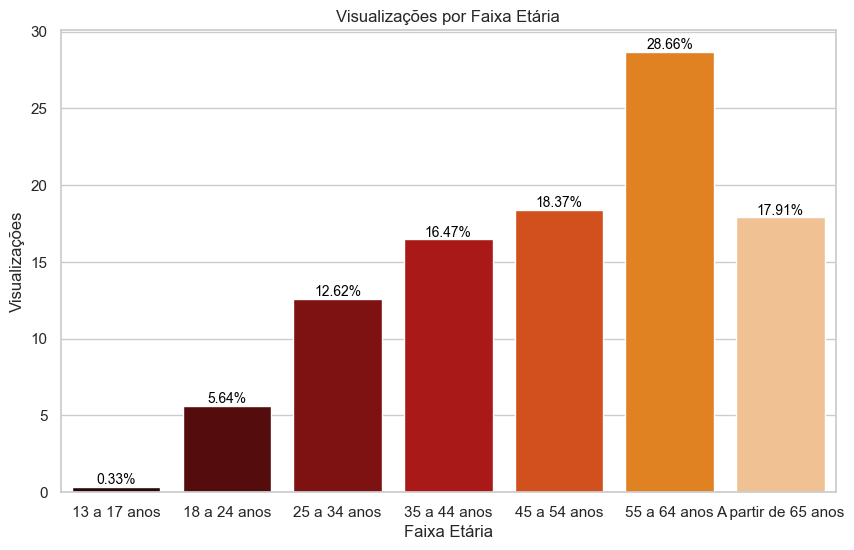

In [30]:
'''
LINK: https://www.youtube.com

VISUALIZAÇÕES POR FAIXA ETÁRIA

https://studio.youtube.com/channel/UC_y3NcZb_eSqVuRlrVeIgAA/analytics/tab-overview/period-default/explore?entity_type=CHANNEL&entity_id=UC_y3NcZb_eSqVuRlrVeIgAA&time_period=4_weeks&explore_type=TABLE_AND_CHART&metric=VIEWS&granularity=DAY&t_metrics=VIEWS&t_metrics=AVERAGE_WATCH_TIME&t_metrics=AVERAGE_WATCH_PERCENTAGE&t_metrics=WATCH_TIME&dimension=VIEWER_AGE&o_column=VIEWER_AGE&o_direction=ANALYTICS_ORDER_DIRECTION_ASC

CAMINHO: menu da foto de perfil > Alternar conta > tribunadonorte > menu da foto de perfil > YouTube Studio > Analytics (barra lateral) > MODO AVANÇADO

Ações: Idade do espectador (menu de linha) >>> icone de download* (Exportar a visualização atual) >>> Valores separados por vírgula (.csv)

--> Arquivo comprimido <--

'''

ytb_idade_visualizações = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\idadeytb.csv')
ytb_idade_visualizações['Visualizações (%)'] = ytb_idade_visualizações['Visualizações (%)'].str.replace(',','.').astype(float)
# Configurar o estilo seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com a paleta "magma"
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Idade do espectador', y='Visualizações (%)', data=ytb_idade_visualizações, palette="gist_heat")#"blend:#7AB,#EDA"

# Adicionar rótulos diretamente acima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicionar rótulos e título
plt.xlabel('Faixa Etária')
plt.ylabel('Visualizações')
plt.title('Visualizações por Faixa Etária')

# Ajustar os rótulos do eixo Y para valores correspondentes
#plt.yticks(range(0, max(visualizacoes)+100000, 200000))

# Desativar a notação científica no eixo Y
plt.ticklabel_format(axis='y', style='plain')

# Mostrar o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14560\2278292365.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Idade do espectador', y='Tempo de exibição (horas) (%)', data=ytb_idade_horas, palette="copper")#"blend:#7AB,#EDA"
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` 

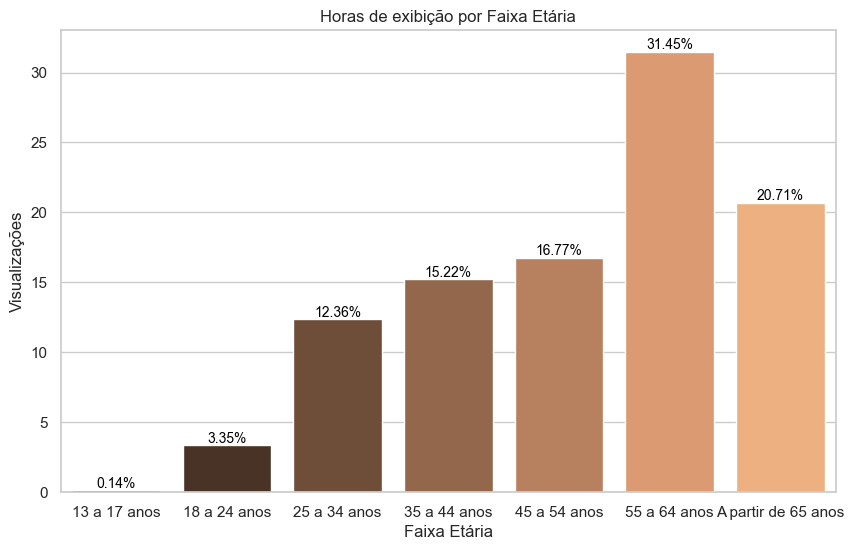

In [31]:
'''
LINK: https://www.youtube.com

https://studio.youtube.com/channel/UC_y3NcZb_eSqVuRlrVeIgAA/analytics/tab-overview/period-default/explore?entity_type=CHANNEL&entity_id=UC_y3NcZb_eSqVuRlrVeIgAA&time_period=4_weeks&explore_type=TABLE_AND_CHART&metric=VIEWS&granularity=DAY&t_metrics=VIEWS&t_metrics=AVERAGE_WATCH_TIME&t_metrics=AVERAGE_WATCH_PERCENTAGE&t_metrics=WATCH_TIME&dimension=VIEWER_AGE&o_column=VIEWER_AGE&o_direction=ANALYTICS_ORDER_DIRECTION_ASC

CAMINHO: menu da foto de perfil > Alternar conta > tribunadonorte > menu da foto de perfil > YouTube Studio > Analytics (barra lateral) > MODO AVANÇADO

Ações: Idade do espectador (menu de linha) >>> icone de download* (Exportar a visualização atual) >>> Valores separados por vírgula (.csv)

--> Arquivo comprimido <--

'''

ytb_idade_horas = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\idadeytb.csv')
ytb_idade_horas['Tempo de exibição (horas) (%)'] = ytb_idade_horas['Tempo de exibição (horas) (%)'].str.replace(',','.').astype(float)
# Configurar o estilo seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com a paleta "magma"
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Idade do espectador', y='Tempo de exibição (horas) (%)', data=ytb_idade_horas, palette="copper")#"blend:#7AB,#EDA"

# Adicionar rótulos diretamente acima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicionar rótulos e título
plt.xlabel('Faixa Etária')
plt.ylabel('Visualizações')
plt.title('Horas de exibição por Faixa Etária')

# Ajustar os rótulos do eixo Y para valores correspondentes
#plt.yticks(range(0, max(visualizacoes)+100000, 200000))

# Desativar a notação científica no eixo Y
plt.ticklabel_format(axis='y', style='plain')

# Mostrar o gráfico
plt.show()

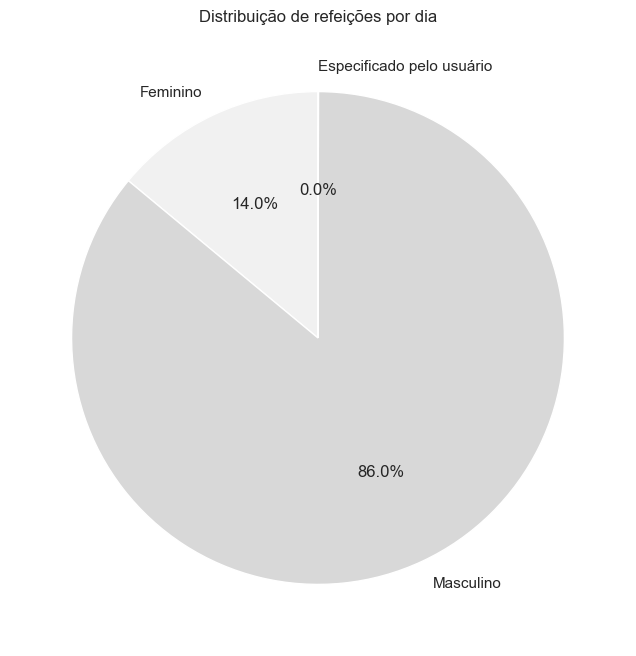

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

'''
LINK: https://www.youtube.com

https://studio.youtube.com/channel/UC_y3NcZb_eSqVuRlrVeIgAA/analytics/tab-overview/period-default/explore?entity_type=CHANNEL&entity_id=UC_y3NcZb_eSqVuRlrVeIgAA&time_period=minus_2_month&explore_type=TABLE_AND_CHART&metric=VIEWS&granularity=DAY&t_metrics=VIEWS&t_metrics=AVERAGE_WATCH_TIME&t_metrics=AVERAGE_WATCH_PERCENTAGE&t_metrics=WATCH_TIME&dimension=VIEWER_GENDER&o_column=VIEWER_GENDER&o_direction=ANALYTICS_ORDER_DIRECTION_ASC

CAMINHO: menu da foto de perfil > Alternar conta > tribunadonorte > menu da foto de perfil > YouTube Studio > Analytics (barra lateral) > MODO AVANÇADO

Ações: Gênero do espectador (menu de linha) >>> icone de download* (Exportar a visualização atual) >>> Valores separados por vírgula (.csv)

--> Arquivo comprimido <--

'''

generoytb = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\generoytb.csv')
generoytb['Visualizações (%)'] = generoytb['Visualizações (%)'].str.replace(',','.').astype(float)
# Criar um gráfico de pizza usando Matplotlib
plt.figure(figsize=(8, 8))  # Ajuste o tamanho da figura conforme necessário

# Plotar o gráfico de pizza usando Matplotlib
plt.pie(generoytb['Visualizações (%)'], labels=generoytb['Gênero do espectador'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("light:#787878"))

# Adicionar título
plt.title('Distribuição de refeições por dia')

# Exibir o gráfico
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14560\1482338815.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Nome da cidade', y='Visualizações', data=ytb_cidades_visualizacoes.iloc[1:11,1:5], palette="copper")#"blend:#7AB,#EDA"
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `na

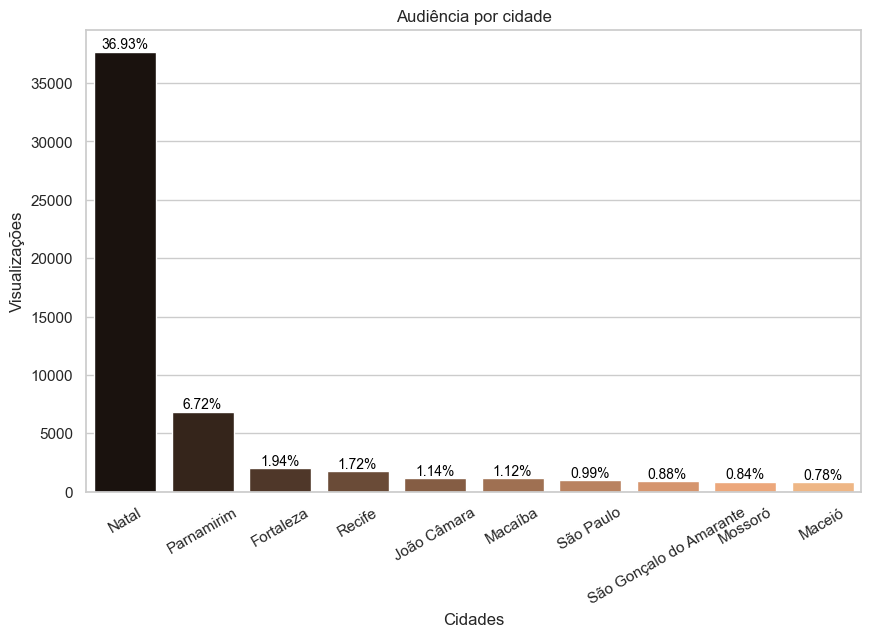

In [33]:
'''
LINK: https://www.youtube.com

VISUALIZAÇÕES POR FAIXA ETÁRIA

https://studio.youtube.com/channel/UC_y3NcZb_eSqVuRlrVeIgAA/analytics/tab-overview/period-default/explore?entity_type=CHANNEL&entity_id=UC_y3NcZb_eSqVuRlrVeIgAA&time_period=minus_2_month&explore_type=TABLE_AND_CHART&metric=VIEWS&granularity=DAY&t_metrics=VIEWS&t_metrics=WATCH_TIME&t_metrics=AVERAGE_WATCH_TIME&dimension=CITY&o_column=VIEWS&o_direction=ANALYTICS_ORDER_DIRECTION_DESC

CAMINHO: menu da foto de perfil > Alternar conta > tribunadonorte > menu da foto de perfil > YouTube Studio > Analytics (barra lateral) > MODO AVANÇADO

Ações: Cidades (menu de linha) >>> icone de download* (Exportar a visualização atual) >>> Valores separados por vírgula (.csv)

--> Arquivo comprimido <--

'''

ytb_cidades_visualizacoes = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\cidadesytb.csv')

# Configurar o estilo seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras com a paleta "magma"
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Nome da cidade', y='Visualizações', data=ytb_cidades_visualizacoes.iloc[1:11,1:5], palette="copper")#"blend:#7AB,#EDA"

total_visualizacoes_cidades = ytb_cidades_visualizacoes.iloc[0,:]['Visualizações']


# Adicionar rótulos diretamente acima de cada barra
for p in ax.patches:
    ax.annotate(f'{(p.get_height()/total_visualizacoes_cidades)*100:,.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adicionar rótulos e título
plt.xlabel('Cidades')
plt.ylabel('Visualizações')
plt.title('Audiência por cidade')

# Ajustar os rótulos do eixo Y para valores correspondentes
#plt.yticks(range(0, max(visualizacoes)+100000, 200000))

# Desativar a notação científica no eixo Y
plt.ticklabel_format(axis='y', style='plain')

plt.xticks(rotation=30)

# Mostrar o gráfico
plt.show()

In [36]:
#import pandas as pd

tw = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\twitter.csv')

twFiltrado = tw[['Data','engajamentos','impressões', 'seguiram']]
twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')

seguidores_twitter = twFiltrado['seguiram'].sum()
impressoes_twitter = twFiltrado['impressões'].sum()
engajamentos_twitter = twFiltrado['engajamentos'].sum()

print(seguidores_twitter)
print(impressoes_twitter)
print(engajamentos_twitter)
twFiltrado


61
29837
595


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14560\2212840104.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')


,Data,engajamentos,impressões,seguiram
0,01-03-2024,27,1506,2
1,02-03-2024,6,644,1
2,03-03-2024,15,561,3
3,04-03-2024,42,1379,4
4,05-03-2024,41,1800,4
5,06-03-2024,37,1849,1
6,07-03-2024,17,1442,3
7,08-03-2024,34,1435,4
8,09-03-2024,9,363,3
9,10-03-2024,4,413,1


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14560\4181404976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')


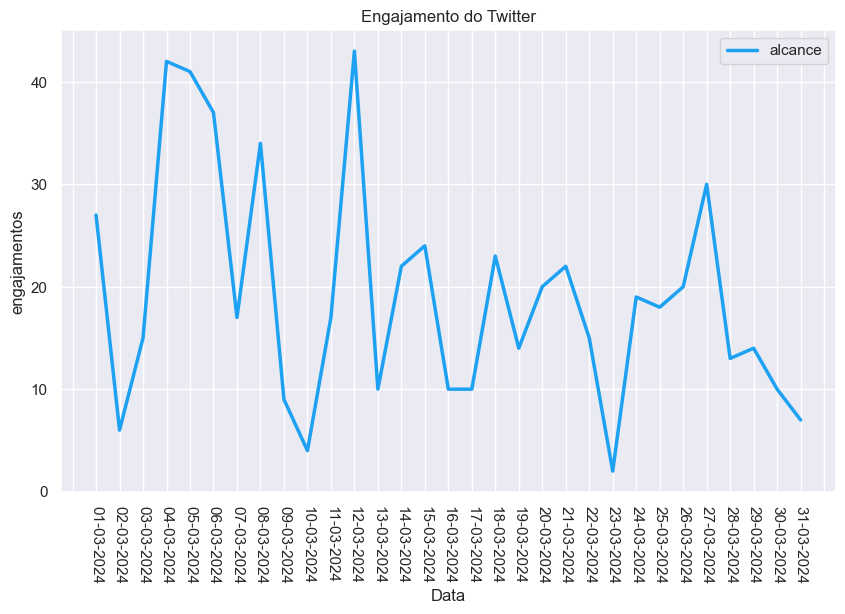

In [37]:
tw = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\twitter.csv')

twFiltrado = tw[['Data','engajamentos','impressões', 'seguiram']]
twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#1DA1F2", "#14171A", "#657786"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="engajamentos", data=twFiltrado, label="alcance", linewidth=2.5, color=cores[0])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
#plt.ylabel("Alcance")
plt.title("Engajamento do Twitter")

plt.legend()

# Exibindo o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14560\3420675622.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')


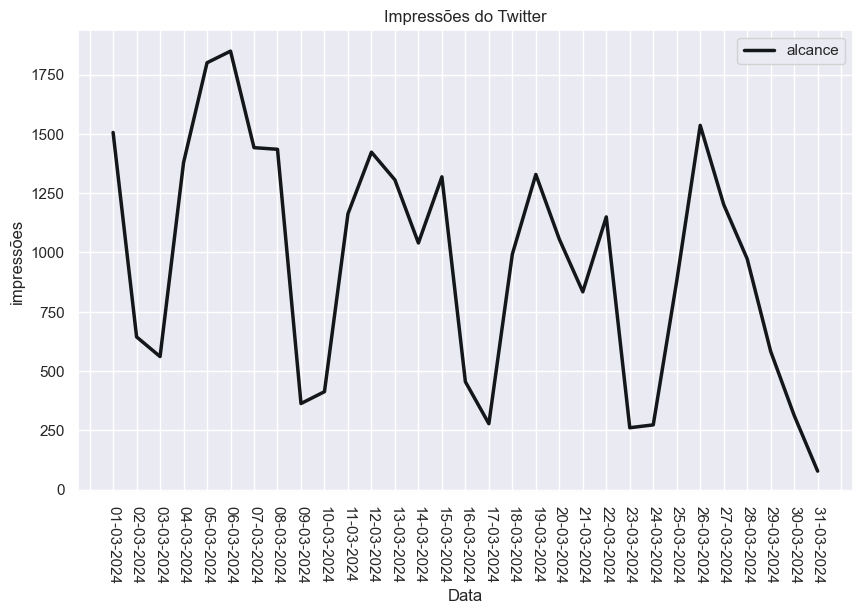

In [38]:
tw = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\twitter.csv')

twFiltrado = tw[['Data','engajamentos','impressões', 'seguiram']]
twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#1DA1F2", "#14171A", "#657786"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="impressões", data=twFiltrado, label="alcance", linewidth=2.5, color=cores[1])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
#plt.ylabel("Alcance")
plt.title("Impressões do Twitter")

plt.legend()

# Exibindo o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14560\581463905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')


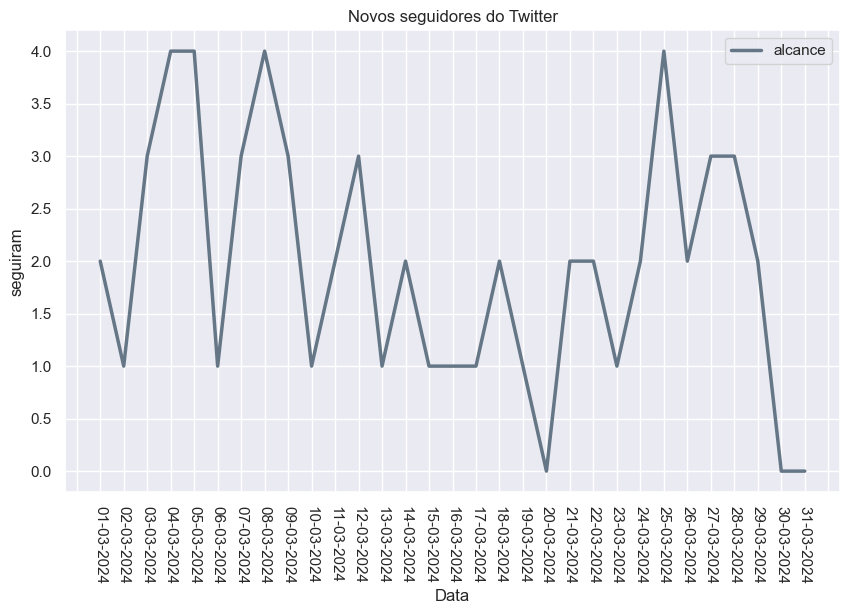

In [39]:
tw = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\twitter.csv')

twFiltrado = tw[['Data','engajamentos','impressões', 'seguiram']]
twFiltrado['Data'] = pd.to_datetime(twFiltrado['Data']).dt.strftime('%d-%m-%Y')

# Configurando o tema do Seaborn
sns.set_theme(style="darkgrid")

# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura

# Definindo a paleta de cores desejada
cores = ["#1DA1F2", "#14171A", "#657786"]

# Plotando o gráfico de linhas
sns.lineplot(x="Data", y="seguiram", data=twFiltrado, label="alcance", linewidth=2.5, color=cores[2])

# Ajustando o intervalo entre as datas no eixo x
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Intervalo de 1 dia

plt.xticks(rotation=-90)

# Adicionando rótulos e título ao gráfico
plt.xlabel("Data")
#plt.ylabel("Alcance")
plt.title("Novos seguidores do Twitter")

plt.legend()

# Exibindo o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11188\1906144414.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Visualizações', y='Midia', data=agrupado, palette="blend:#77BAB5,#7794BA,#77AABB,#77BA9F,#777FBA")#"blend:#7AB,#EDA"
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name

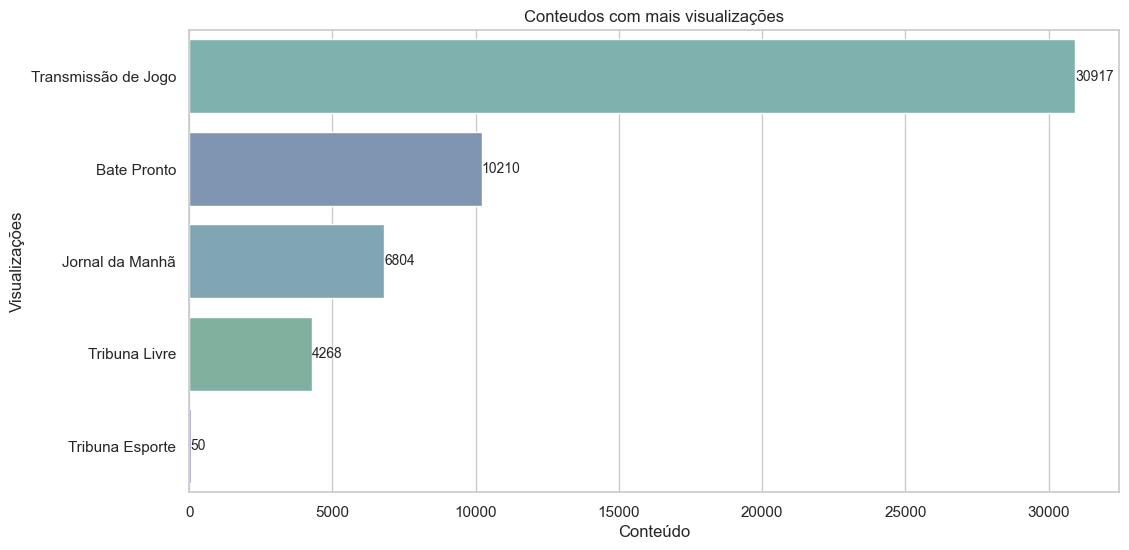

In [36]:
conteudo = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\conteudoYTB.csv')
conteudo=conteudo.dropna()
# Função para agrupar os usuários por mídia
def agrupar_por_midia(row):
    if '🔴' in row['Título do vídeo']:
        return 'Transmissão de Jogo'
    elif 'JORNAL DA MANHÃ' in row['Título do vídeo']:
        return 'Jornal da Manhã'
    # elif 'Jornal da Manhã' in row['Título do vídeo']:
    #     return 'Jornal da Manhã'
    elif 'TRIBUNA ESPORTE' in row['Título do vídeo']:
        return 'Tribuna Esporte'
    # elif 'Tribuna Esporte' in row['Título do vídeo']:
    #     return 'Tribuna Esporte'
    elif 'TRIBUNA LIVRE' in row['Título do vídeo']:
        return 'Tribuna Livre'
    # elif 'Tribuna Livre' in row['Título do vídeo']:
    #     return 'Tribuna Livre'
    elif 'BATE PRONTO' in row['Título do vídeo']:
        return 'Bate Pronto'
    # elif 'Bate Pronto' in row['Título do vídeo']:
    #     return 'Bate Pronto'
conteudo['Midia'] = conteudo.apply(agrupar_por_midia, axis=1)

agrupado = conteudo.groupby('Midia')['Visualizações'].sum().reset_index().sort_values(by='Visualizações',ascending=False)
# agrupado['Visualizações'] = agrupado['Visualizações'].astype(int)
# agrupado.sort_values(by='Visualizações',ascending=False)
sns.set_theme(style="whitegrid")

# Criar o gráfico de barras com a paleta "magma"
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Visualizações', y='Midia', data=agrupado, palette="blend:#77BAB5,#7794BA,#77AABB,#77BA9F,#777FBA")#"blend:#7AB,#EDA"

# Adicionar rótulos diretamente acima de cada barra
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
#                 textcoords='offset points')

# Adicionar percentuais
for i, p in enumerate(plt.gca().patches):
    percentage = p.get_width()
    plt.text(p.get_x() + p.get_width() + 0.02, p.get_y() + p.get_height() / 2, f"{percentage:.0f}", ha='left', va='center', size=10)

# Adicionar rótulos e título
plt.xlabel('Conteúdo')
plt.ylabel('Visualizações')
plt.title('Conteudos com mais visualizações')


# Ajustar os rótulos do eixo Y para valores correspondentes
#plt.yticks(range(0, max(visualizacoes)+100000, 200000))

# Desativar a notação científica no eixo Y
plt.ticklabel_format(axis='x', style='plain')

# Mostrar o gráfico
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11188\864952691.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Tempo de exibição (horas)', y='Midia', data=agrupado, palette="blend:#77BAB5,#7794BA,#77AABB,#77BA9F,#777FBA")#"blend:#7AB,#EDA"
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` inste

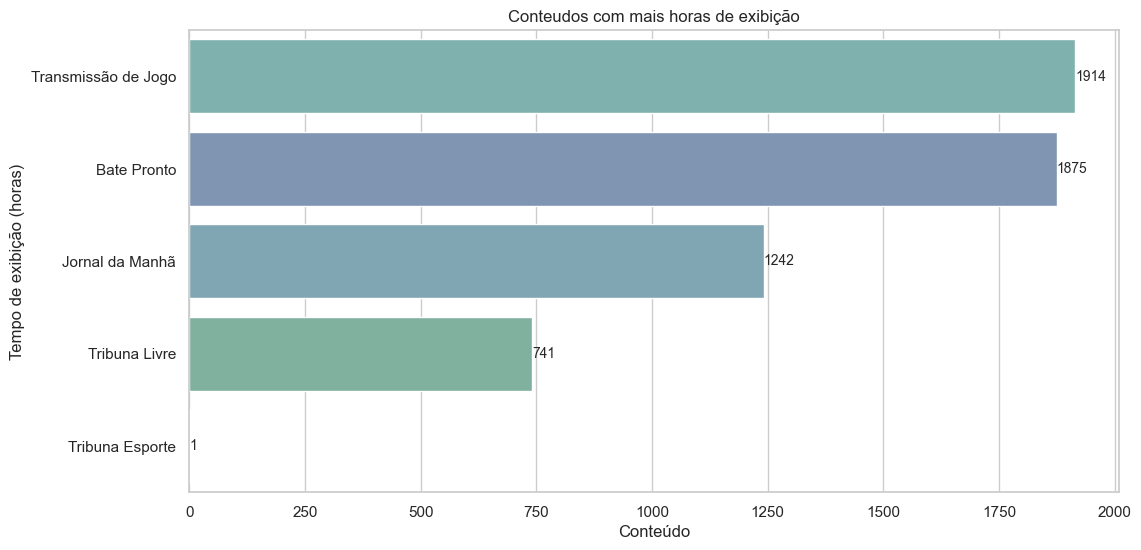

In [40]:
# agrupado = conteudo.groupby('Midia')['Tempo de exibição (horas)'].sum().reset_index()
# agrupado = conteudo.groupby('Midia')['Visualizações'].sum().reset_index()
# agrupado.sort_values(by='Visualizações',ascending=False)

conteudo = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\conteudoYTB.csv')
conteudo=conteudo.dropna()
# Função para agrupar os usuários por mídia
def agrupar_por_midia(row):
    if '🔴' in row['Título do vídeo']:
        return 'Transmissão de Jogo'
    elif 'JORNAL DA MANHÃ' in row['Título do vídeo']:
        return 'Jornal da Manhã'
    elif 'TRIBUNA ESPORTE' in row['Título do vídeo']:
        return 'Tribuna Esporte'
    elif 'TRIBUNA LIVRE' in row['Título do vídeo']:
        return 'Tribuna Livre'
    elif 'BATE PRONTO' in row['Título do vídeo']:
        return 'Bate Pronto'
conteudo['Midia'] = conteudo.apply(agrupar_por_midia, axis=1)
conteudo['Tempo de exibição (horas)'] = conteudo['Tempo de exibição (horas)'].str.replace(',', '.').astype(float)
agrupado = conteudo.groupby('Midia')['Tempo de exibição (horas)'].sum().reset_index().sort_values(by='Tempo de exibição (horas)',ascending=False)
# agrupado['Visualizações'] = agrupado['Visualizações'].astype(int)
# agrupado.sort_values(by='Visualizações',ascending=False)
sns.set_theme(style="whitegrid")

# Criar o gráfico de barras com a paleta "magma"
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Tempo de exibição (horas)', y='Midia', data=agrupado, palette="blend:#77BAB5,#7794BA,#77AABB,#77BA9F,#777FBA")#"blend:#7AB,#EDA"

# Adicionar rótulos diretamente acima de cada barra
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
#                 textcoords='offset points')

# Adicionar percentuais
for i, p in enumerate(plt.gca().patches):
    percentage = p.get_width()
    plt.text(p.get_x() + p.get_width() + 0.02, p.get_y() + p.get_height() / 2, f"{percentage:.0f}", ha='left', va='center', size=10)

# Adicionar rótulos e título
plt.xlabel('Conteúdo')
plt.ylabel('Tempo de exibição (horas)')
plt.title('Conteudos com mais horas de exibição')


# Ajustar os rótulos do eixo Y para valores correspondentes
#plt.yticks(range(0, max(visualizacoes)+100000, 200000))

# Desativar a notação científica no eixo Y
plt.ticklabel_format(axis='x', style='plain')

# Mostrar o gráfico
plt.show()

In [33]:
conteudo = pd.read_csv(r'C:\Users\Usuario\Documents\Repositórios\csv\JPN\conteudoYTB.csv')
conteudo=conteudo.dropna()

conteudo['Tempo de exibição (horas)'] = conteudo['Tempo de exibição (horas)'].str.replace(',', '.')

conteudo

,Conteúdo,Título do vídeo,Horário de publicação do vídeo,Visualizações,Tempo de exibição (horas),Inscritos,Receita estimada (BRL),Impressões,Taxa de cliques de impressões (%)
1,UfNwtbtO6Bg,🔴 ABC x Brusque/SC - AO VIVO - Copa do Brasil ...,"Mar 13, 2024",15282,974.3052,35,"51,587",51366,"21,57"
2,dKaQgDOqHwc,América x ABC - AO VIVO - Copa do Nordeste - 2...,"Mar 21, 2024",10691,589.6362,28,"45,41",57394,"14,7"
3,ZXSOQzalaxA,América x São Luiz/RS - AO VIVO - Copa do Bras...,"Mar 14, 2024",10487,477.0248,22,"32,32",41597,"19,1"
4,5b3_9EWqYFM,Altos/PI x América - AO VIVO - Copa do Nordest...,"Mar 24, 2024",6768,245.486,24,"24,423",31690,"15,8"
5,WPvXvlKPEiY,ABC x Sport - AO VIVO - Copa do Nordeste - 23/...,"Mar 24, 2024",6576,383.8314,28,"15,988",40750,"13,77"
...,...,...,...,...,...,...,...,...,...
484,0gfNRP1ddNM,JORNAL DA MANHÃ NATAL - 31/01/2024,"Feb 1, 2024",1,0.0022,0,"0,002",33,"3,03"
485,0mztfZaTaUA,ENTREVISTA COM O SECRETÁRIO DE OBRAS E INFRAES...,"Feb 1, 2023",1,0.0133,0,"0,004",5,20
493,234EiNAf4Ak,"Entrevista com Babá Pereira, Presidente da Fed...","Jan 4, 2023",1,0.0236,0,"0,003",10,10
496,2IQK5jZFAAQ,🔴 Floresta/CE x América - AO VIVO - Série C - ...,"Aug 26, 2023",1,0.0051,0,"0,002",36,0
